> <p><small><small>This Notebook is made available subject to the licence and terms set out in the <a href = "http://www.github.com/google-deepmind/ai-foundations">AI Research Foundations Github README file</a>.

<img src="https://storage.googleapis.com/dm-educational/assets/ai_foundations/GDM-Labs-banner-image-C3-white-bg.png">

# Lab: Separate More Complex Data

<a href='https://colab.research.google.com/github/google-deepmind/ai-foundations/blob/master/course_3/gdm_lab_3_3_separate_more_complex_data.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

Observe how adding multiple layers enables multi-layer perceptrons to learn complex decision boundaries.


20 minutes

## Overview

In this lab, you will explore another next-token prediction task. This time, you will train a model to choose the correct token from the following three possible tokens:

- "mat"
- "apple"
- "bank"

In the previous lab, you were able to use a classifier based on a single neuron (and hence only a single layer) to separate the embeddings into two classes. For the embeddings in this task, that will not be possible. You will observe that you in fact require a multi-layer neural network to successfully separate this data into the three classes.






### What you will learn:

By the end of this lab, you will:
* Understand the effect of adding a hidden layer to a neural network.
* Understand the role of a non-linear activation function.

### Tasks

Imagine that you want a model to choose the correct next token from:
- "mat"
- "apple"
- "bank"

But remember, the word "bank" has two meanings:
- a river bank
- a financial institution

The embedding for a prompt such as "They walked along the river" will therefore be quite different from an embedding for a prompt such as "They deposited the check at the nearest".

**In this lab, you will**:
* Visualize and compare the decision boundaries of:
    * a single-layer neural network with multiple neurons
    * a multi-layer neural network without an activation function
    * a multi-layer neural netework with a ReLU activation function


This activity only involves running the code in the notebook in order to train the models and generate the visualizations. **You do not need to add any additional code.** Instead, focus on the visualizations in each step.


## How to use Google Colaboratory (Colab)

Google Colaboratory (also known as Google Colab) is a platform that allows you to run Python code in your browser. The code is written in *cells* that are excuted on a remote server.

To run a cell, hover over a cell and click on the `run` button to its left. The run button is the circle with the triangle (▶). Alternatively, you can also click on a cell and use the keyboard combination Ctrl+Return (or ⌘+Return if you are using a Mac).

To try this out, run the following cell. This should print today's day of the week below it.

In [ ]:
from datetime import datetime

print(f"Today is {datetime.today():%A}.")

Note that the order in which you run the cells matters. When you are working through a lab, make sure to always run all cells in order. Otherwise, the code might not work. If you take a break while working on a lab, Colab may disconnect you. In that case, you have to execute all cells again before continuing your work. To make this easier, you can select the cell you are currently working on and then choose __Runtime → Run before__  from the menu above (or use the keyboard combination Ctrl/⌘ + F8). This will re-execute all cells before the current one.

## Imports

In this lab, you will primarily work with pre-defined functions from the custom `ai_foundations` package. You will use this package to define and train MLP models and to generate the visualizations. In the background, this package uses Keras to define and train the MLP models.

Run the following cell to import all required packages.

In [1]:
%%capture
# Install the custom package for this course.
!pip install "git+https://github.com/google-deepmind/ai-foundations.git@main"

import os # For adjusting Keras settings.
os.environ["KERAS_BACKEND"] = "jax" # Set a parameter for Keras.

# Packages used.
import jax.numpy as jnp # For converting the embeddings and labels to matrices.
import pandas as pd # For loading the dataset.
from ai_foundations import machine_learning # For defining and training MLPs.
from ai_foundations import visualizations # For visualizing data and boundaries.

## Load and plot the data

To get started, run the following cell to load the dataset that contains the embeddings and labels. Note that by convention, the matrix that contains the input data, in this case the embeddings, is usually called `X`. The vector that contains the target labels is called `y`.

This convention will be used from now on.

In [2]:
# Load data using pandas.
df = pd.read_csv("https://storage.googleapis.com/dm-educational/assets/ai_foundations/mat-apple-bank-dataset.csv")

# Extract embeddings (Embedding_dim_1, Embedding_dim_2) and labels.
X = jnp.array(df[["Embedding_dim_1", "Embedding_dim_2"]].values)
# Labels: 0 ("mat"), 1 ("apple"), or 2 ("bank").
y = jnp.array(df["Label"].values)

# Human-readable labels.
labels = ["mat", "apple", "bank"]

Next, run the following cell to plot the points.

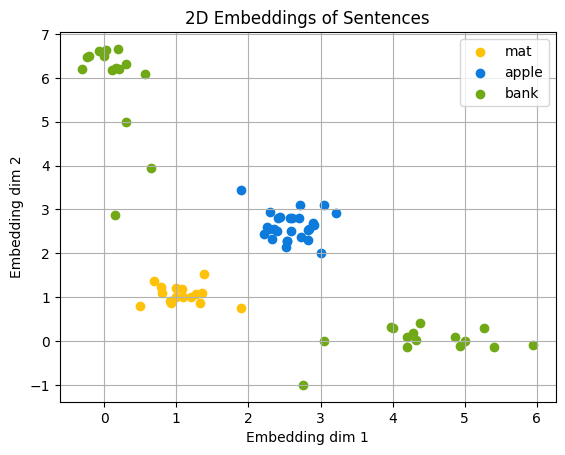

In [3]:
visualizations.plot_data_and_mlp(X, y, labels, title="2D Embeddings of Sentences")

### What did you observe?

You likely noticed that the green points for the class "bank" are split into two clusters. This means that straight lines will not be able to separate all three classes well.

## Train a single-layer model

You will now use this data to train a single-layer model and visualize its decision boundaries. Unlike in the previous lab, this model has a layer with **multiple neurons** and uses a **SoftMax** activation function. This introduces multiple lines as decision boundaries, instead of just one.

Run the following cell multiple times. Each time, it will train the single-layer model and generate the visualization of the decision boundary.

<br />

------
> **ℹ️ Info: How to interpret decision boundary visualizations**
>
> In a decision boundary visualization, you will see shaded areas in multiple colors. Each of the colors represents one class as predicted by the model. For example, the area that is shaded in green represents the set of all points for which the model predicts the class "bank" because it assigns the highest probability to that class. If a data point falls within the area of its color, then the model makes a correct prediction (e.g., all green points within the area shaded in green are correct predictions). If a data point falls within an area of a different color, then the true and the predicted class are different and the model misclassified the data point.
------

Accuracy (single layer model): 45.21%


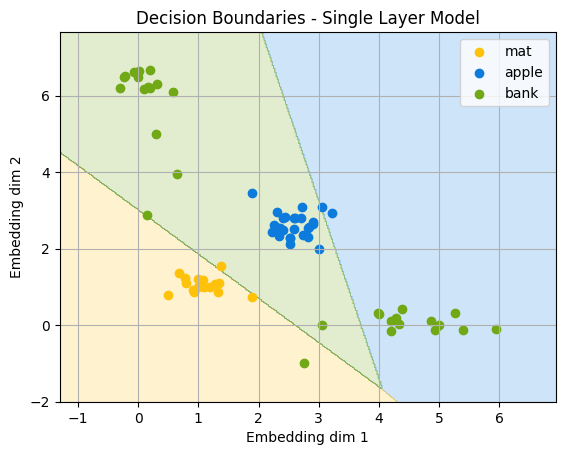

In [8]:
# The parameter hidden_dims defines the dimensions of each hidden layer.
# If an empty list is passed, as is done here, the MLP will be initialized
# without any hidden layers, resulting in a single-layer neural network.
#
# Note that you will learn in subsequent labs how to implement an MLP in Python.
# For now, you can use `build_nlp` for defining an MLP, and `train_mlp` for
# training it.
model_1layer = machine_learning.build_mlp(hidden_dims=[], n_classes=3)

history = machine_learning.train_mlp(model_1layer, X, y, 200)

print(f"Accuracy (single layer model): {history.history['accuracy'][-1]*100:.2f}%")

visualizations.plot_data_and_mlp(
    X,
    y,
    labels,
    mlp_model=model_1layer,
    title="Decision Boundaries - Single Layer Model",
)

### What did you observe?

The model divided the space into three areas, separated by two straight lines (note that sometimes one of the three areas may be too small to see, but there are always three areas). Regardless of how many times you run the training of the model, it will never perfectly separate the three classes. This is because a single-layer model can only learn such linear decision boundaries.

Above the plot, the code also prints the **accuracy** of the model on the training data. The accuracy is a metric that captures the percentage of examples that have been correctly classified. An accuracy of 100% means that every example in the dataset has been assigned the correct class by the model.



## Train a multi-layer neural network

To fix this, you will now experiment with a model with an additional **hidden layer**.

Run the following cell to train a multi-layer neural network and visualize its new decision boundary.

As a first step, visualize the following model. It implements multiple layers but *does not* use an **activation function** in its **hidden layer**.

Accuracy (multi-layer model): 73.97%


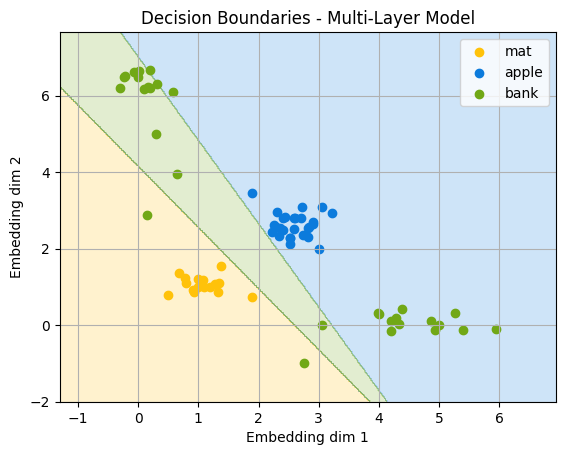

In [9]:
# Setting this to [10] means the model with have one hidden layer with
# 10 neurons.
hidden_dims = [10]
model_2layer = machine_learning.build_mlp(
    hidden_dims=hidden_dims, n_classes=3, activation="linear"
)

history = machine_learning.train_mlp(model_2layer, X, y, 200)

print(f"Accuracy (multi-layer model): {history.history['accuracy'][-1]*100:.2f}%")
visualizations.plot_data_and_mlp(
    X,
    y,
    labels,
    mlp_model=model_2layer,
    title="Decision Boundaries - Multi-Layer Model",
)

### What did you observe?

As you likely observed, the model learns multiple decision boundaries but, again, these boundaries cannot separate the data properly. This is because, without the non-linear activation function, a multi-layer neural network cannot learn more complex functions than a single-layer neural network.

### Add the activation function

The following network is exactly the same as the one above but uses a **ReLU** activation function to compute the output of the hidden layer. Run the following cell to observe how the decision boundaries change.

Accuracy (multi-layer model): 100.00%


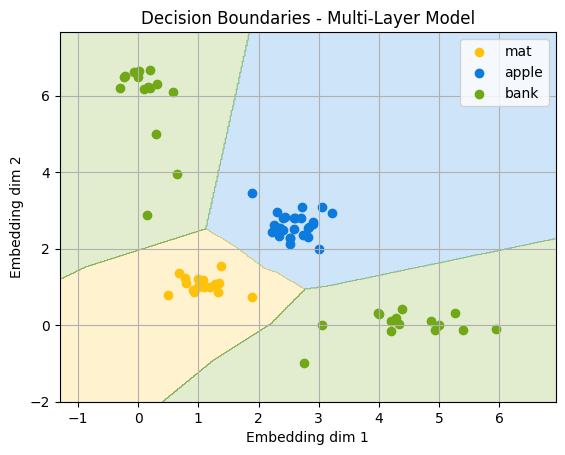

In [10]:
# Setting this to [10] means the model will have one hidden layer with
# 10 neurons.
hidden_dims = [10]
model_2layer = machine_learning.build_mlp(
    hidden_dims=hidden_dims, n_classes=3, activation="relu"
)

history = machine_learning.train_mlp(model_2layer, X, y, 200)

print(f"Accuracy (multi-layer model): {history.history['accuracy'][-1]*100:.2f}%")
visualizations.plot_data_and_mlp(
    X,
    y,
    labels,
    mlp_model=model_2layer,
    title="Decision Boundaries - Multi-Layer Model",
)

### What did you observe?

The model should now suceed at classifiying both clusters of "bank". This is because the multi-layer model can learn **non-linear decision boundaries**, which are able to handle this situation.

If this is not the case and you see that adding a hidden layer does not lead to good predictions, change the hidden layer size and try again.

## Why is a non-linear activation function needed?

In the previous activities, you have seen that only a neural network with at least one hidden layer and a non-linear activation function can properly separate the datapoints in this dataset. The final section of this lab provides an informal mathematical proof of why this is the case.

Assume that there is a two-layer neural network *without* an **activation function** in the **hidden layer** that has:
* an input layer with two features
* a hidden layer with one neuron
* an output layer with one neuron.

For simplicity, also assume that the bias terms are all 0 so that we can ignore them.

This means that the weighted sum in the hidden layer with weights $w^{(h)}$ is:

$$z^{(h)}_1=w_1^{(h)}x_1 + w_2^{(h)}x_2$$

<br />

The output of the hidden layer, $y^{(h)}$ is then the same as $z^{(h)}$ since there is no non-linear activation function:

$$y^{(h)}_1 = z^{(h)}_1$$

<br />

Now consider the output layer. The input to the output layer $x^{(o)}$ is the output of the hidden layer $y^{(h)}$. The weighted sum $z^{(o)}$ in the hidden layer is therefore:

$$z^{(o)} = w^{(o)}_1 y^{(h)}_1$$

<br />

You can now substitute $y^{(h)}_1$ by $z^{(h)}_1$, since $y^{(h)}_1 = z^{(h)}_1$ and then substitute and simplify further using the equations described:

\begin{align}
z^{(o)} &= w^{(o)}_1 y^{(h)}_1 \\ &= w^{(o)}_1 z^{(h)}_1 \\ &= w^{(o)}_1 \left(w_1^{(h)}x_1 + w_2^{(h)}x_2\right) \\ &= w^{(o)}_1w_1^{(h)}x_1 + w^{(o)}_1w_2^{(h)}x_2
\end{align}

<br />

Now if you define new weights $w_1'$ and $w_2'$ such that $w_1' = w^{(o)}_1w_1^{(h)}$ and $w_2' = w^{(o)}_1w_2^{(h)}$, you can define the output layer as:

$$z^{(o)} = w_1'x_1 + w_2'x_2$$

<br />

Note that this is now the equation of **a single-layer neural network with two inputs**. This is no coincidence, any multi-layer neural network without a non-linear activation function can also be expressed as a single-layer neural network. Therefore a network without the activation function cannot learn more complex functions that a single-layer MLP.

However, if there is a non-linear activation function applied to the weighted sum in the hidden layer, then this reduction of a multi-layer MLP to a single layer MLP is no longer possible and the model can learn more complex decision boundaries.

## Summary

In this lab, you have explored different neural network models for data that cannot be separated by straight lines. You saw that a **single layer model** could not learn  decision boundaries that could separate the three classes in the dataset. A **multi layer model** with a non-linear activation function, on the other hand, was able to learn a non-linear decision boundary and separate both "bank" clusters correctly.

The ability of multi-layer neural networks to learn complex decision boundaries is the reason why they are so powerful and form the backbone of very complex models such as language models.

In the next activity, you will implement your own MLP.